In [42]:
from google.colab import files

In [43]:
uploaded = files.upload()

Saving Data_Pathrise.xlsx to Data_Pathrise (1).xlsx


# **Import Libraries**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle


# **Read the data**

In [45]:
df = pd.read_excel('Data_Pathrise.xlsx',index_col='id')

# **Data Understanding**

In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.

In [46]:
df.shape

(2544, 15)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 1 to 2544
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [48]:
df['pathrise_status'].unique()

array(['Active', 'Closed Lost', 'Placed', 'Withdrawn (Failed)',
       'Withdrawn (Trial)', 'Withdrawn', 'Deferred', 'Break', 'MIA'],
      dtype=object)

In [49]:
df.head()

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
id,,,,,,,,,,,,,,,
1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


# **Data cleaning**

*   fill nulls from datasets
*   convert data to integer


In [50]:
df=df.fillna(method='ffill')

In [51]:
df.isna().sum()

pathrise_status                0
primary_track                  0
cohort_tag                     0
program_duration_days          2
placed                         0
employment_status              0
highest_level_of_education     0
length_of_job_search           0
biggest_challenge_in_search    0
professional_experience        0
work_authorization_status      0
number_of_interviews           0
number_of_applications         0
gender                         0
race                           0
dtype: int64

There are 2 nulls which couldn't fill by (method = 'ffill'),
we should fill them in another stage.

In [52]:
df['program_duration_days']=df['program_duration_days'].fillna(0)

In [53]:
df

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
id,,,,,,,,,,,,,,,
1,Active,SWE,OCT19A,0.0,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
2,Active,PSO,JAN20A,0.0,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2541,Withdrawn (Failed),Data,JAN19B,488.0,0,Contractor,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2542,Active,SWE,SEP18C,488.0,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American


* Try to Find and Prove relation between pathrise Status
categories and Program Duration Days missing values

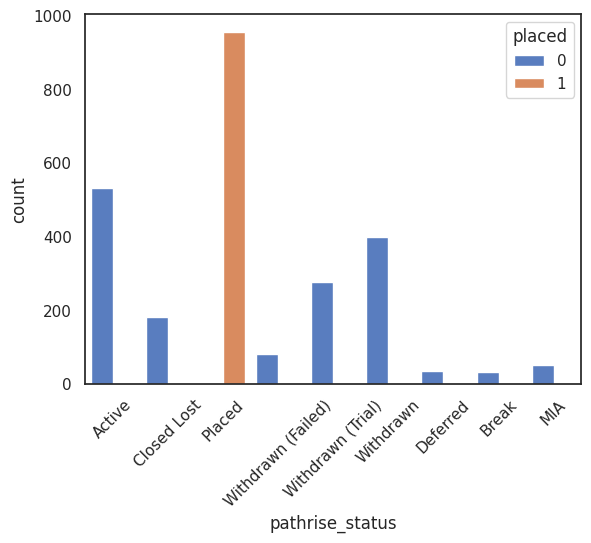

In [54]:
sns.countplot(data=df, x='pathrise_status', hue='placed', palette='muted')
plt.xticks(rotation=45)
plt.show()

* The plot shows that there is a direct relation between pathrise_status and target feature.

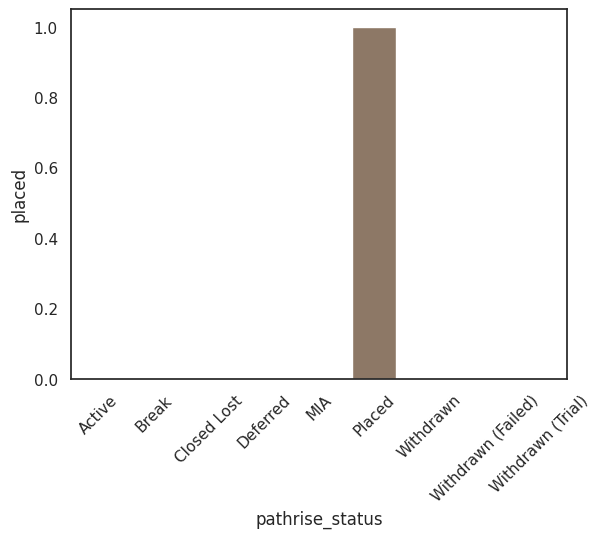

In [55]:
grouped_data=df.groupby("pathrise_status")["placed"].mean().reset_index()
sns.barplot(x="pathrise_status", y="placed", data=grouped_data)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='placed', ylabel='count'>

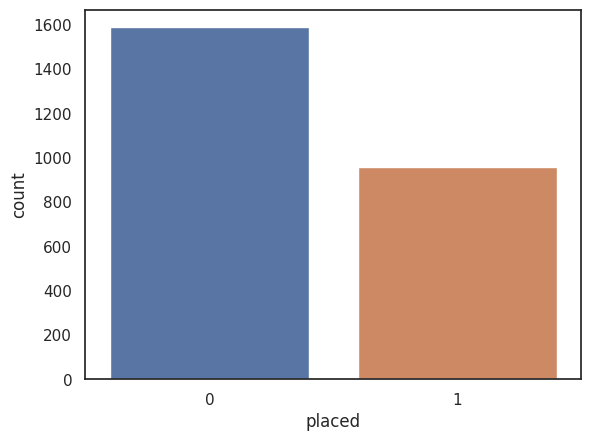

In [56]:
sns.countplot(data=df, x='placed')

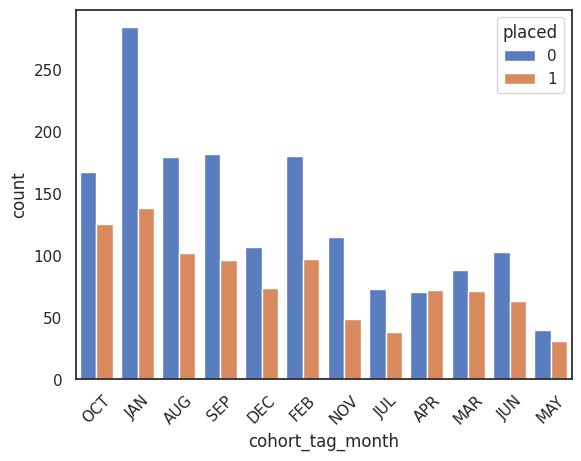

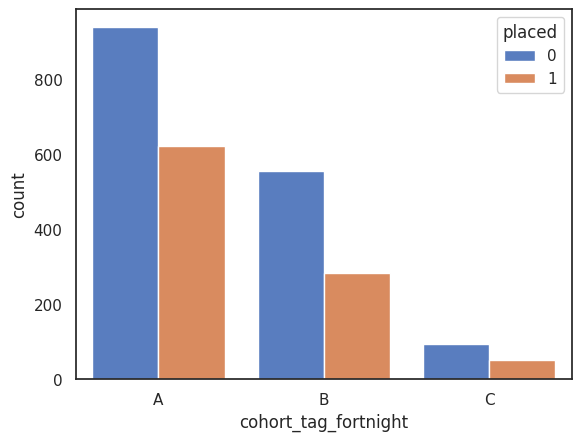

In [57]:
df['cohort_tag'].unique()
# extract month from cohort_tag
df['cohort_tag_month'] = df['cohort_tag'].str[:3]
df['cohort_tag_month'].unique()
# extract fortnight symbol from cohort_tag
df['cohort_tag_fortnight'] = df['cohort_tag'].str[-1:]
df['cohort_tag_fortnight'].unique()
df['cohort_tag_fortnight'] = df['cohort_tag_fortnight'].str.upper()
df['cohort_tag_fortnight'].unique()

sns.countplot(data=df, x='cohort_tag_month', hue='placed', palette='muted')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='cohort_tag_fortnight', hue='placed', palette='muted')
plt.show()

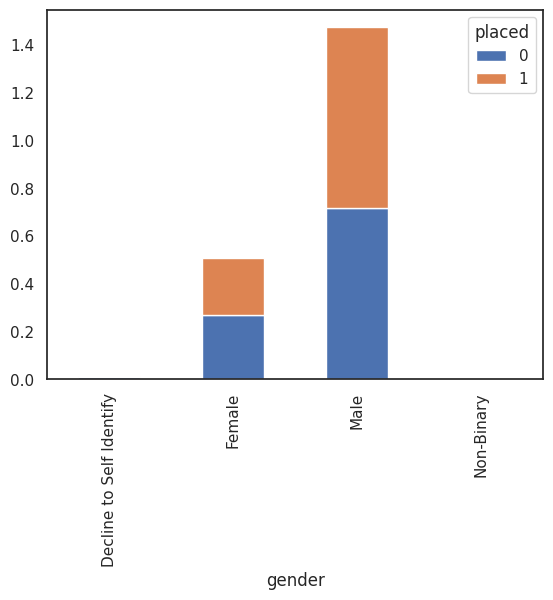

In [58]:
df_grouped = (df.groupby('placed')['gender'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=True))

In [59]:
df.groupby('placed')['gender'].value_counts(normalize=True)
df.groupby('placed')['gender'].value_counts(normalize=True).unstack('placed')

placed,0,1
gender,,
Decline to Self Identify,0.009446,0.003138
Female,0.270151,0.238494
Male,0.717254,0.757322
Non-Binary,0.003149,0.001046


<Axes: xlabel='gender'>

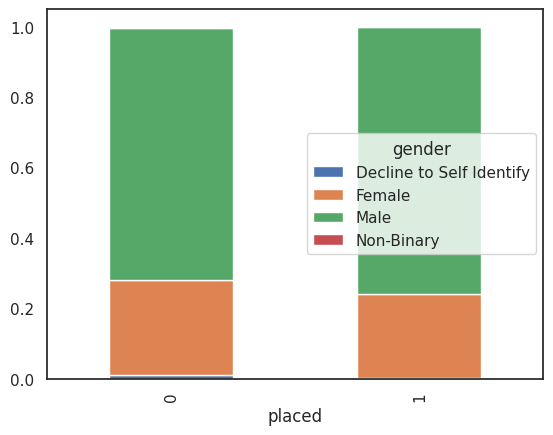

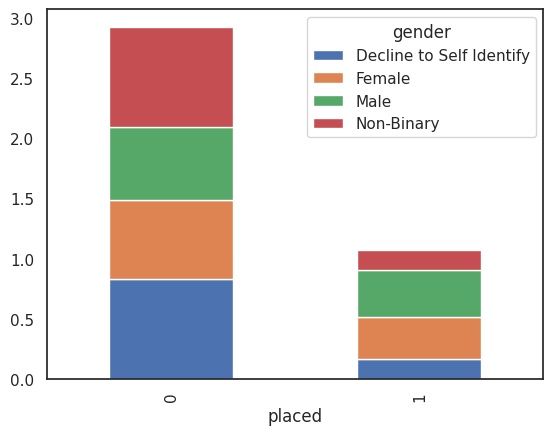

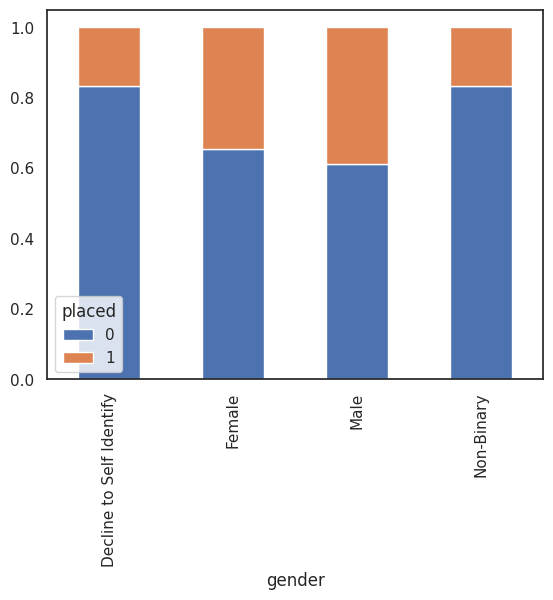

In [60]:
df.groupby('placed')['gender'].value_counts(normalize=True).unstack('gender').plot.bar(stacked=True)
df.groupby('gender')['placed'].value_counts(normalize=True).unstack('gender').plot.bar(stacked=True)
df.groupby('gender')['placed'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=True)

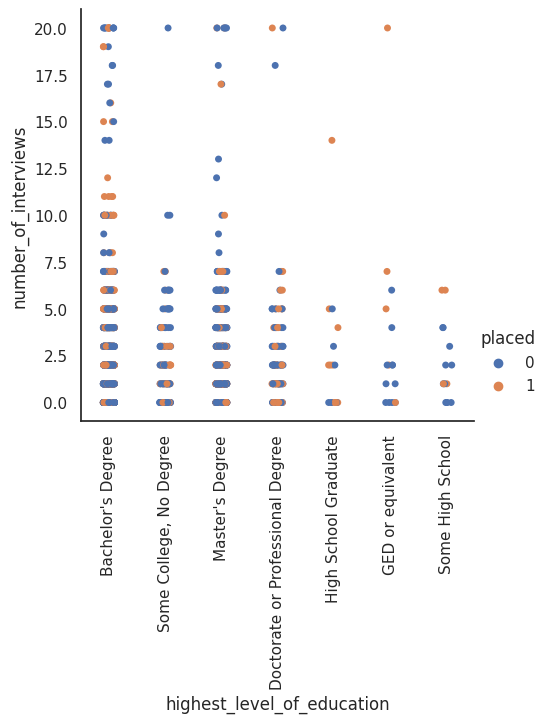

In [61]:
sns.catplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='number_of_interviews', ylabel='Density'>

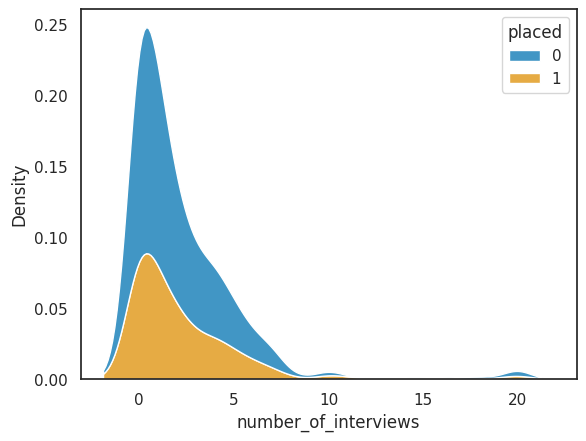

In [62]:
sns.kdeplot(data=df, x='number_of_interviews', hue='placed', multiple='stack', palette='colorblind')

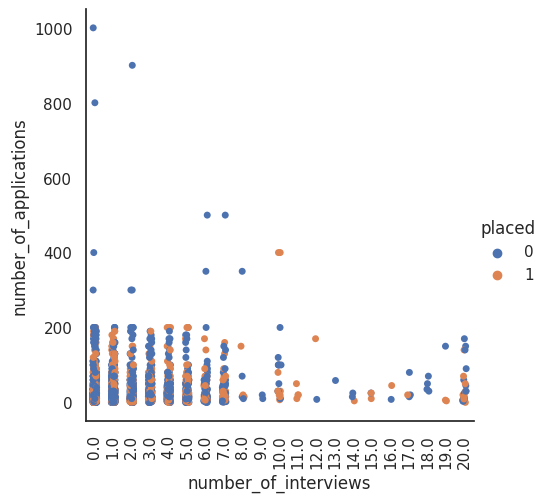

In [63]:
sns.catplot(data=df, x='number_of_interviews', y='number_of_applications', hue='placed')
plt.xticks(rotation=90)
plt.show()

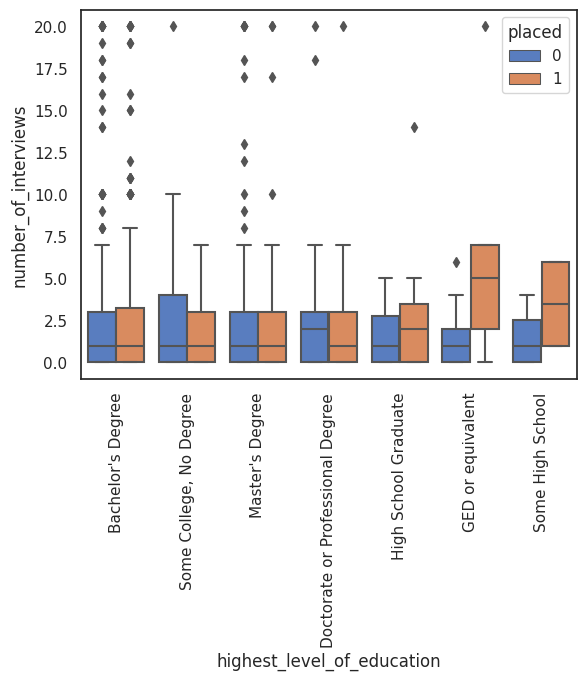

In [64]:
sns.boxplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed', palette='muted')
plt.xticks(rotation=90)
plt.show()

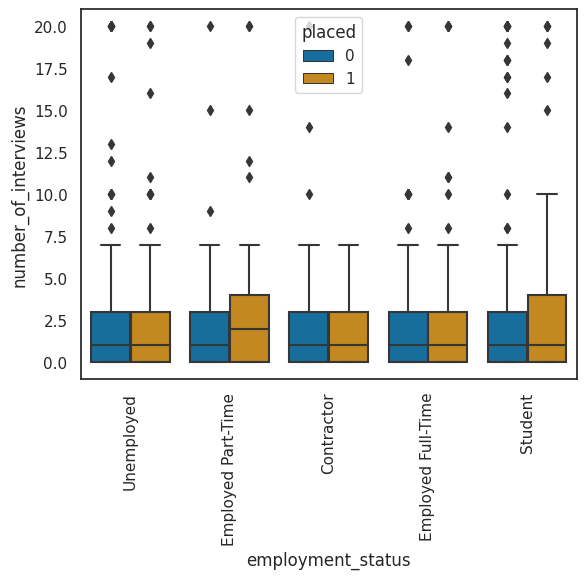

In [65]:
sns.boxplot(data=df, x='employment_status', y='number_of_interviews', hue='placed', palette='colorblind')
plt.xticks(rotation=90)
plt.show()

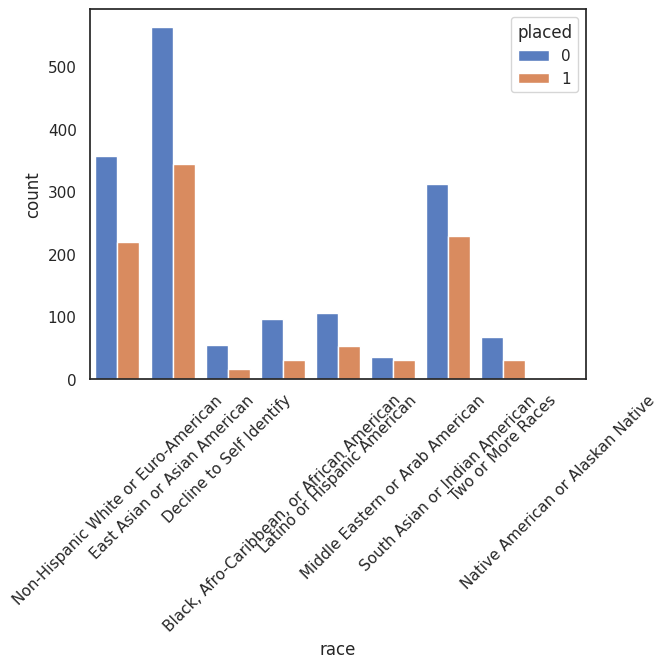

In [66]:
sns.countplot(data=df, x='race', hue='placed', palette='muted')
plt.xticks(rotation=45)
plt.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 1 to 2544
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2544 non-null   object 
 3   program_duration_days        2544 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2544 non-null   object 
 6   highest_level_of_education   2544 non-null   object 
 7   length_of_job_search         2544 non-null   object 
 8   biggest_challenge_in_search  2544 non-null   object 
 9   professional_experience      2544 non-null   object 
 10  work_authorization_status    2544 non-null   object 
 11  number_of_interviews         2544 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

# **Exploratory Data Analysis (EDA)**

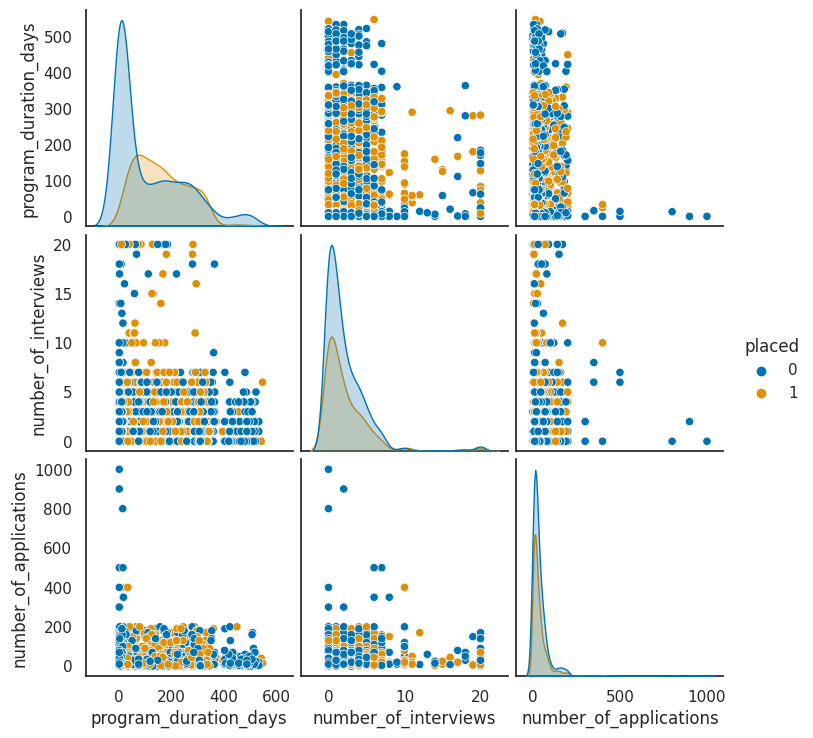

In [68]:
sns.pairplot(data=df, hue='placed', palette='colorblind')
plt.show()

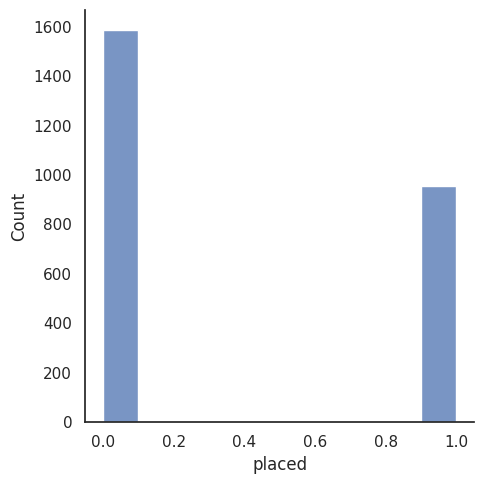

In [69]:
sns.displot(x='placed', data= df, bins = 10)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 1 to 2544
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2544 non-null   object 
 3   program_duration_days        2544 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2544 non-null   object 
 6   highest_level_of_education   2544 non-null   object 
 7   length_of_job_search         2544 non-null   object 
 8   biggest_challenge_in_search  2544 non-null   object 
 9   professional_experience      2544 non-null   object 
 10  work_authorization_status    2544 non-null   object 
 11  number_of_interviews         2544 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [71]:
# Filter numerical columns with float data type
float_columns = df.select_dtypes(include=['float']).columns
len(float_columns)

2

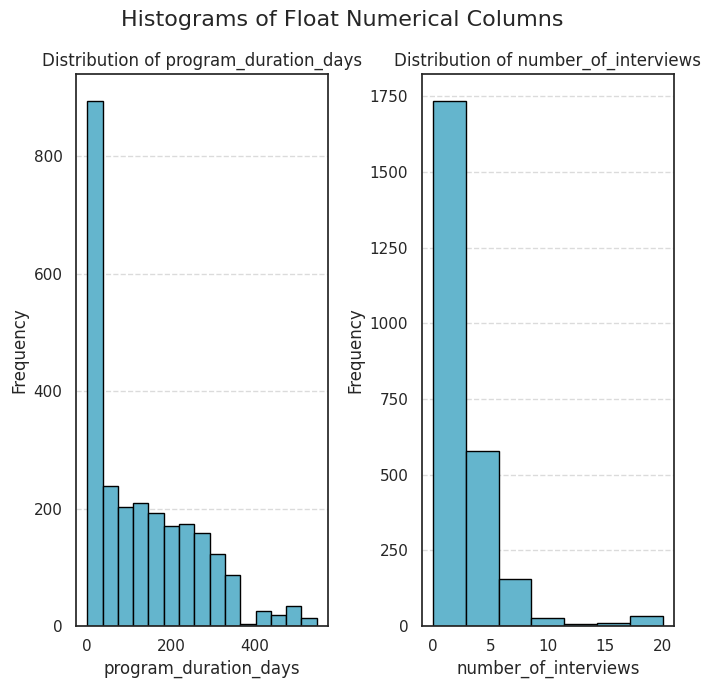

In [72]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=(7, 7))
fig.suptitle('Histograms of Float Numerical Columns', fontsize=16)

# Flatten the 2x2 arrayof subplots to simplify indexing
axes = axes.flatten()

# make a list for number of bins
bins_list = [15, 7, 15, 15, 15]

# Loop through float columns and create histograms
for i, column in enumerate(float_columns):
    axes[i].hist(df[column], bins=bins_list[i], color='c', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)


# Adjust layout to prevent overlapping titles
plt.tight_layout()

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)

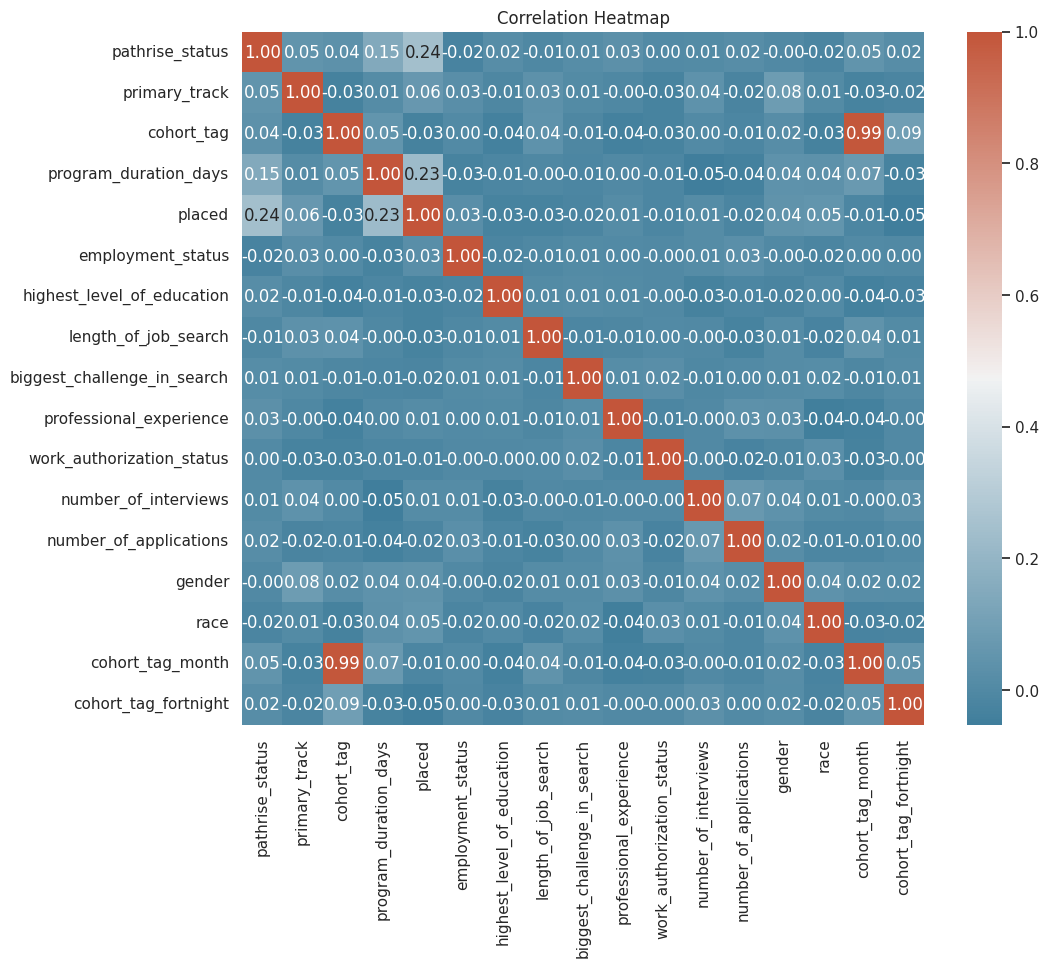

In [74]:
# Set the style of the plot
sns.set_style(style=None, rc=None)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Compute the correlation matrix for the encoded dataframe
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap= cmap, annot=True, fmt=".2f", ax=ax)

# Set the title of the plot
ax.set_title("Correlation Heatmap")

# Display the plot
plt.show()

<Axes: >

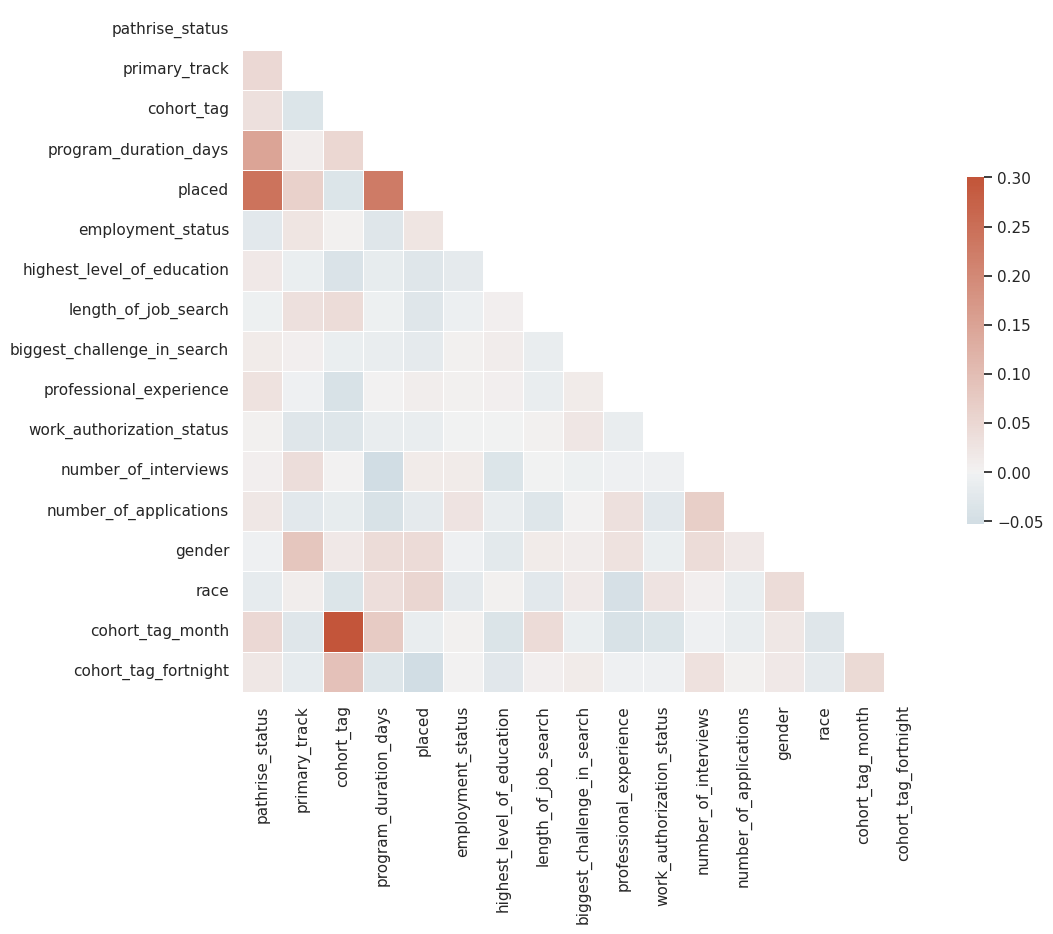

In [75]:

sns.set_theme(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
cols=[ 'primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race','number_of_interviews','number_of_applications']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)

primary_track,0,1,2,3,4,5
Not placed %,64.52,68.06,50.00,75.16,58.64,83.33
Placed %,35.48,31.94,50.00,24.84,41.36,16.67
population %,9.75,11.32,0.08,12.66,65.96,0.24


employment_status,0,1,2,3,4
Not placed %,67.91,63.10,61.09,62.08,61.51
Placed %,32.09,36.90,38.91,37.92,38.49
population %,7.35,18.75,11.52,33.69,28.69


highest_level_of_education,0,1,2,3,4,5,6
Not placed %,61.60,56.93,68.75,37.50,64.77,63.04,73.33
Placed %,38.40,43.07,31.25,62.50,35.23,36.96,26.67
population %,54.87,5.39,0.63,0.63,32.47,5.42,0.59


length_of_job_search,0,1,2,3,4
Not placed %,58.91,65.73,64.02,63.11,63.41
Placed %,41.09,34.27,35.98,36.89,36.59
population %,31.76,20.87,9.39,33.14,4.83


biggest_challenge_in_search,0,1,2,3,4,5,6,7,8,9
Not placed %,60.00,65.78,57.05,61.32,61.11,64.06,59.82,69.77,61.43,75.68
Placed %,40.00,34.22,42.95,38.68,38.89,35.94,40.18,30.23,38.57,24.32
population %,2.36,7.35,11.71,8.33,7.08,39.70,8.81,1.69,11.52,1.45


professional_experience,0,1,2,3
Not placed %,63.57,61.22,60.88,62.54
Placed %,36.43,38.78,39.12,37.46
population %,37.66,23.82,11.56,26.97


work_authorization_status,0,1,2,3,4,5,6,7,8
Not placed %,60.00,61.71,64.71,62.97,61.19,68.42,100.00,61.60,66.67
Placed %,40.00,38.29,35.29,37.03,38.81,31.58,nan,38.40,33.33
population %,1.18,48.86,6.01,28.34,7.90,2.24,0.20,4.91,0.35


gender,0,1,2,3
Not placed %,83.33,65.30,61.14,83.33
Placed %,16.67,34.70,38.86,16.67
population %,0.71,25.83,73.23,0.24


race,0,1,2,3,4,5,6,7,8
Not placed %,75.59,77.14,62.07,66.88,53.03,nan,61.98,57.59,68.37
Placed %,24.41,22.86,37.93,33.12,46.97,100.00,38.02,42.41,31.63
population %,4.99,2.75,35.65,6.17,2.59,0.12,22.64,21.23,3.85


number_of_interviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Not placed %,61.26,65.59,60.83,65.18,61.79,61.97,60.00,64.06,57.14,100.00,47.62,nan,50.00,100.00,66.67,33.33,50.00,75.00,100.00,33.33,60.00
Placed %,38.74,34.41,39.17,34.82,38.21,38.03,40.00,35.94,42.86,nan,52.38,100.00,50.00,nan,33.33,66.67,50.00,25.00,nan,66.67,40.00
population %,33.18,21.82,13.25,8.81,8.33,5.58,3.34,2.52,0.28,0.08,0.83,0.16,0.08,0.04,0.12,0.12,0.08,0.16,0.16,0.12,0.98


number_of_applications,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Not placed %,64.47,53.70,63.24,59.72,65.67,66.10,50.00,61.64,50.77,66.13,67.36,61.82,64.33,63.86,60.26,61.90,59.57,58.02,67.19,72.73,59.38,56.86,47.22,67.74,53.85,66.67,47.06,62.50,61.11,70.59,66.67,83.33,54.55,65.00,100.00,100.00,33.33,100.00,100.00,100.00,100.00
Placed %,35.53,46.30,36.76,40.28,34.33,33.90,50.00,38.36,49.23,33.87,32.64,38.18,35.67,36.14,39.74,38.10,40.43,41.98,32.81,27.27,40.62,43.14,52.78,32.26,46.15,33.33,52.94,37.50,38.89,29.41,33.33,16.67,45.45,35.00,nan,nan,66.67,nan,nan,nan,nan
population %,2.99,2.12,2.67,2.83,2.63,2.32,2.75,2.87,2.56,2.44,7.59,11.64,6.72,6.53,6.13,4.13,3.69,3.18,5.03,4.32,3.77,2.00,1.42,1.22,0.51,0.47,0.67,0.63,0.71,0.67,0.59,0.47,0.43,0.79,0.12,0.08,0.12,0.08,0.04,0.04,0.04


* I would download the cleadned df to use it for next stage.

In [77]:
#df.to_excel('cleaned_df.xlsx', index= False)
#files.download('cleaned_df.xlsx')

# **Feature Engineering**

# **Modeling**